XTX Take Home Test

1. analyse timeseries data of financial instruments from perspective of risk analyst

2. plot data and conduct statistical analysis using python from first principles

3. use standard libraries only (numpy, pandas, scipy, matplotlib, seaborn)

4. 90 minutes time limit

In [2]:
import pandas as pd
df = pd.read_csv('prices_(1).csv',delimiter='|')
print(df)

           Date  Asset01   Asset02  Asset03  Asset04  Asset05  Asset06  \
0     02-Jan-17      NaN   1012.35      NaN      NaN      NaN      NaN   
1     03-Jan-17   225.24   1024.38  216.505      NaN  7500.00    86.91   
2     04-Jan-17   226.58   1091.66  216.507      NaN  6730.00    87.38   
3     05-Jan-17   226.40    971.26  216.510      NaN  6680.00    87.25   
4     06-Jan-17   227.21    898.16  216.518      NaN  6510.00    87.23   
...         ...      ...       ...      ...      ...      ...      ...   
1659  12-May-23   411.59  26447.70  235.872  64.6479     3.48    74.42   
1660  15-May-23   413.01  27354.85  235.902  64.8318     3.35    74.40   
1661  16-May-23   410.25  26956.57  235.923  63.9532     3.49    73.88   
1662  17-May-23   415.23  27337.78  235.959  63.7178     3.32    74.08   
1663  18-May-23   419.23  27220.25      NaN  63.1069      NaN    73.90   

       Asset07  Asset08   Asset09  Asset10  Asset11  
0     2183.909      NaN  0.008456   41.880      NaN  
1  

Plotting overview of all timeseries

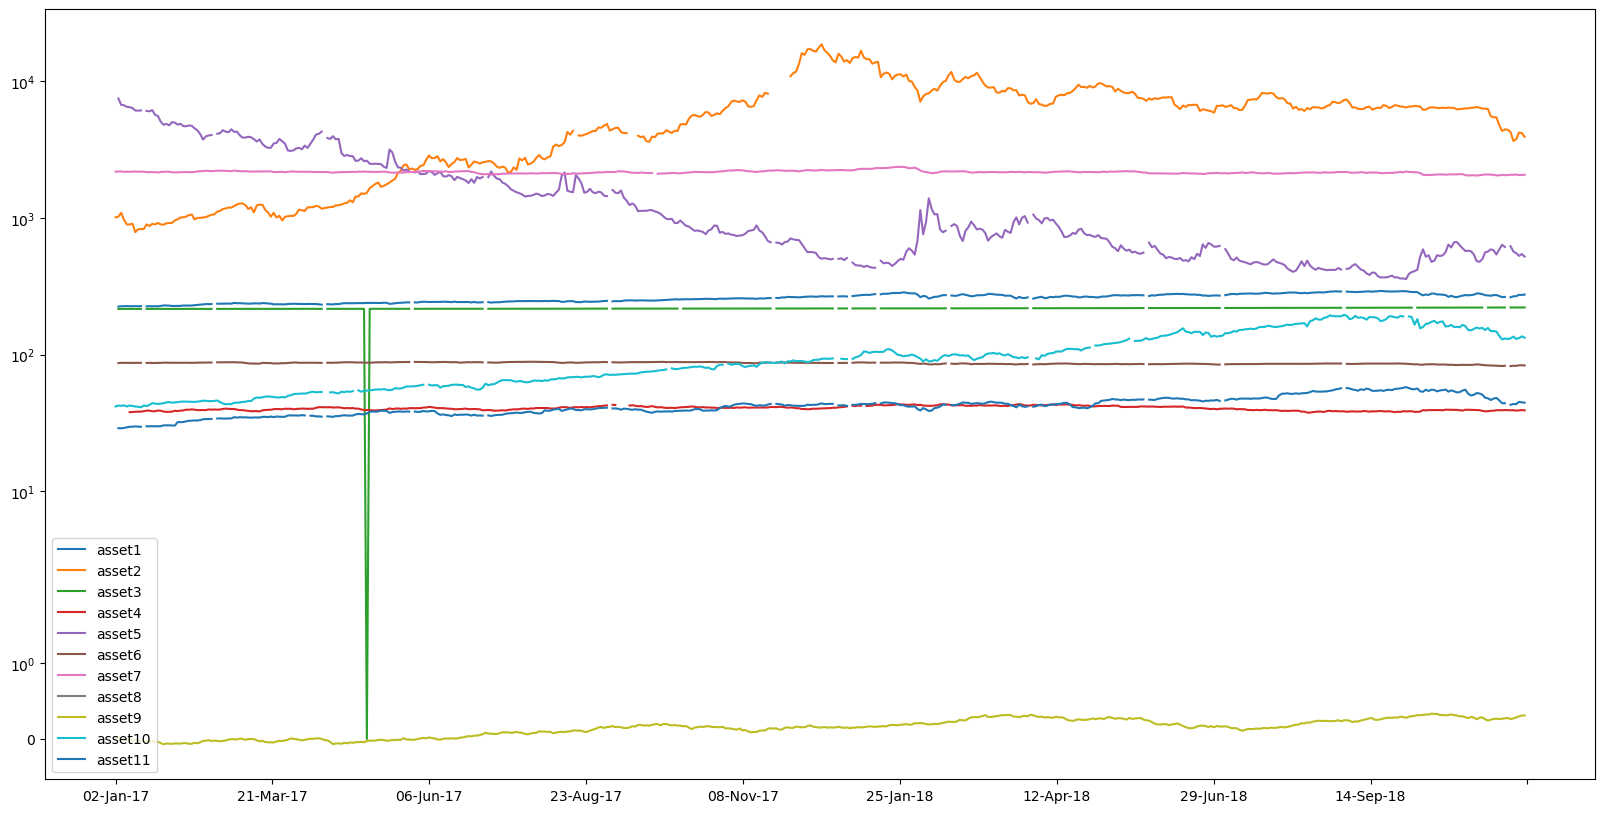

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# parsing data from df to numpy arrays
headers = list(df.columns.values[1:])

hc = 500
date = df['Date'].head(hc).to_numpy()
assets = []
for x in range(11):
    if x+1 < 10:
        assets.append(df['Asset0'+str(x+1)].head(hc).to_numpy())
    else:
        assets.append(df['Asset'+str(x+1)].head(hc).to_numpy())
        
plt.figure(figsize=(20,10))

for x in range(11):
    # symlog scale
    plt.yscale('symlog')
    plt.plot(date,(assets[x]),label='asset'+str(x+1))
    plt.xticks(np.linspace(0, hc, 10))

plt.legend()
plt.show()


Plotting individual timeseries subplots with no analysis

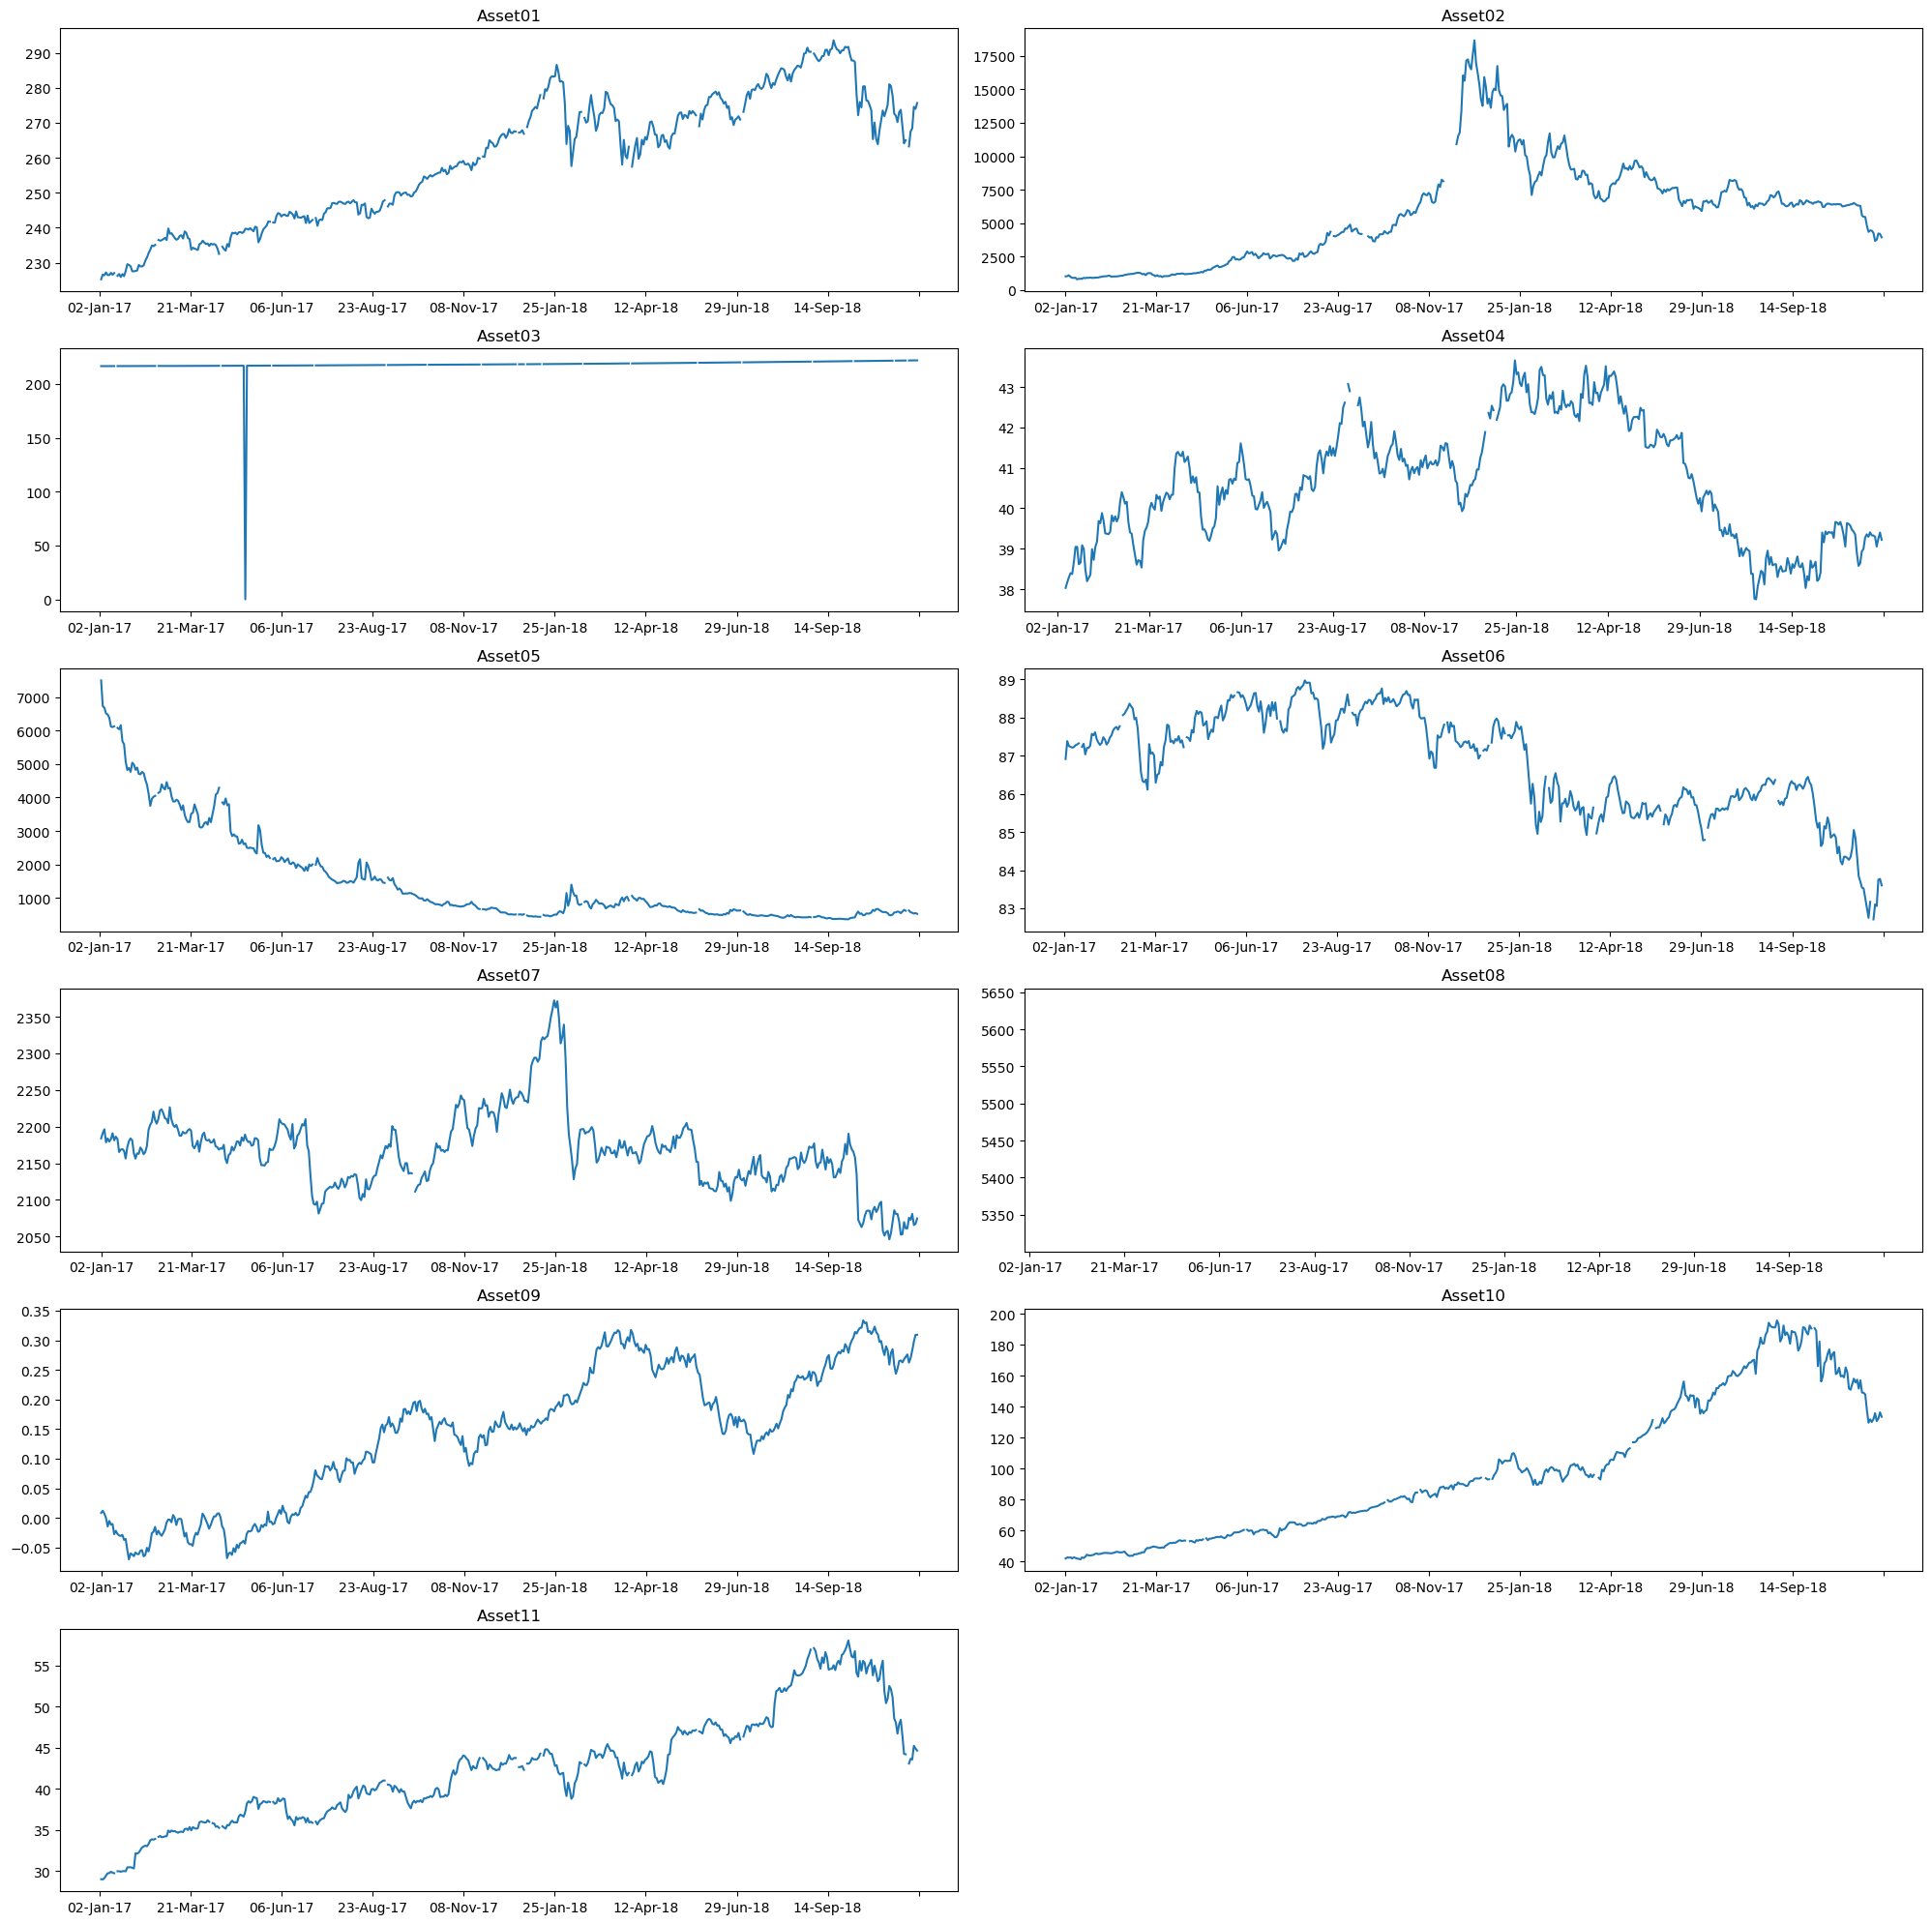

In [4]:
# initialise all subplots 
fig, ax = plt.subplots(6,2,figsize=(20,20))
fig.delaxes(ax[-1, -1])

# plot individual timeseries subplots
ax = ax.ravel()
for i, ax in enumerate(ax):
    if i == 11:
        break
    else:
        ax.plot(date, assets[i])
        ax.set_xticks(np.linspace(0, hc, 10))
    ax.set_title(headers[i])

plt.tight_layout()
plt.show()

unable to display asset8 due to the many NaN values in the array, can use a scatter plot instead

___

Statistical analysis 

1. technical / momentum analysis (short term approach) (no data on trading volume or range -> cannot calculate ATR)<br>

    Example of viable indicators:
    - Relative Stregnth Index (RSI) 
    - Moving Average Convergence Divergence (MACD) <br>
<br>
2. time series analysis (trend + seasonal + residuals) (long term trends)<br>

    Methods:  
    - (trend) use least squares to find best fit (check for biases and update equation) 
    - (seasonal) discrete fourier transform to find sinusoid's dominant frequencies 
    - (residual) non-zero random variable (may not be independent over time) -> produce probability model<br>
<br>
3. some classical risk indicators

    - sharpe ratio
    - mean
    - variance<br>
<br>
4. correlation between various assets -> measure sensitivity towards underlying trends, world events, geopolitical risks etc

___

1. Technical analysis

- RSI indicator

    In theory, when RSI crosses 30, it indicates a bullish trend (oversold) whereas when RSI crosses 70, it indicates a bearish trend (overbought).

    Note. Charts are plotted using the entire timeseries data. Edit the .head() variable count in the first code block for more obvious trends/

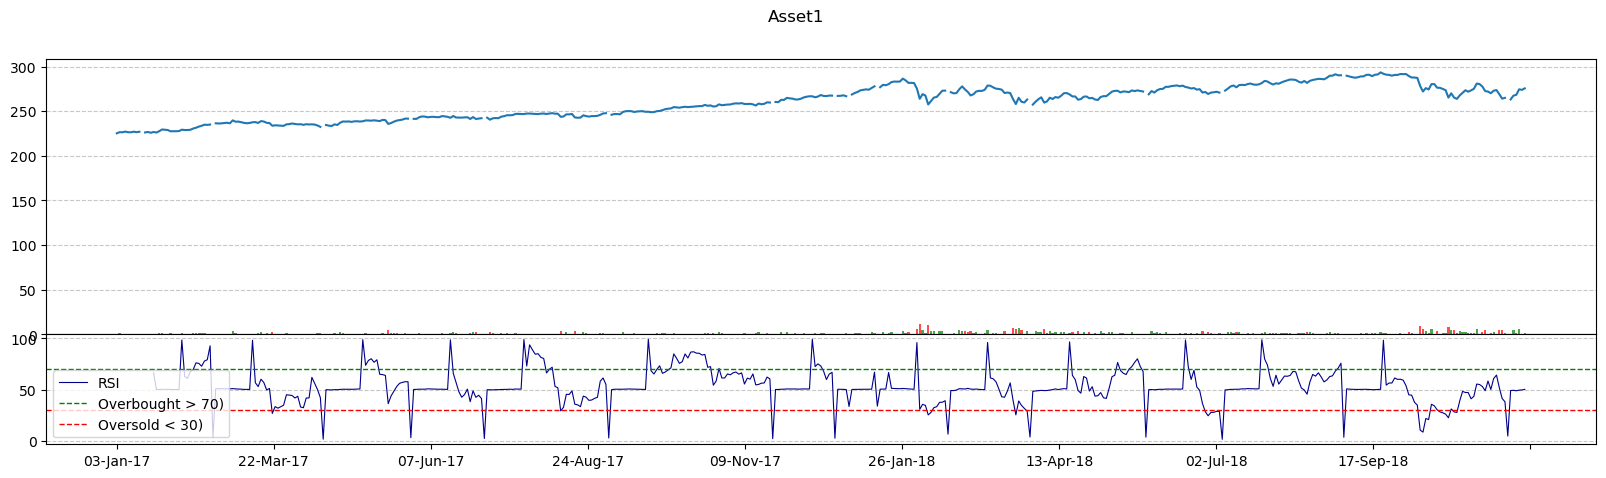

Initial Shares: 100
Initial portfolio value: 22524.0
Current portfolio value: 0.0
Profit: 5040.999999999996


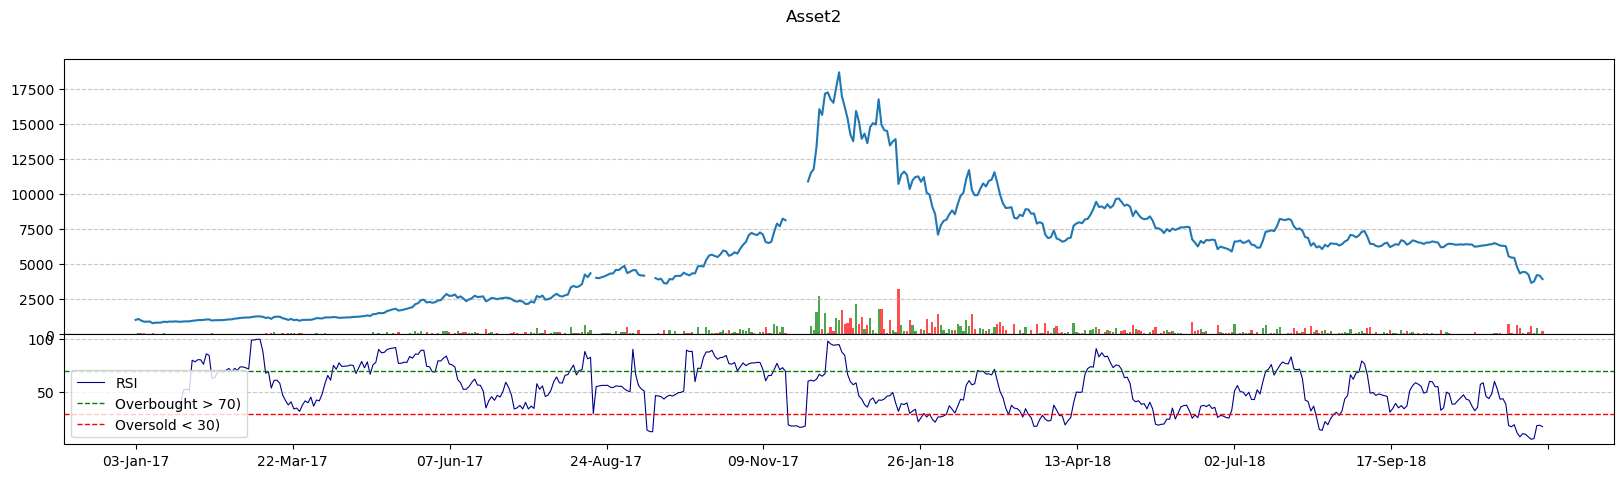

Initial Shares: 100
Initial portfolio value: 101235.0
Current portfolio value: 2607256.0
Profit: 2899059.0


C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_26384\2750652265.py:18: RuntimeWarning: divide by zero encountered in divide
  rs = average_gains / average_losses


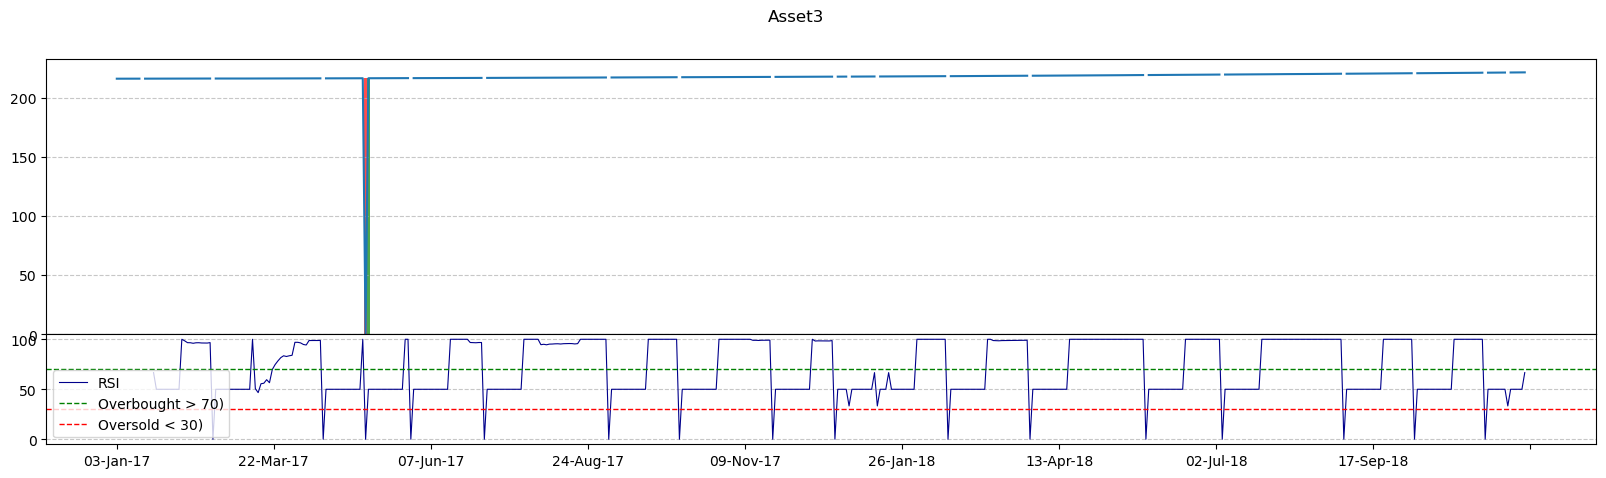

Initial Shares: 100
Initial portfolio value: 21650.5
Current portfolio value: 0.0
Profit: 535.5999999999985


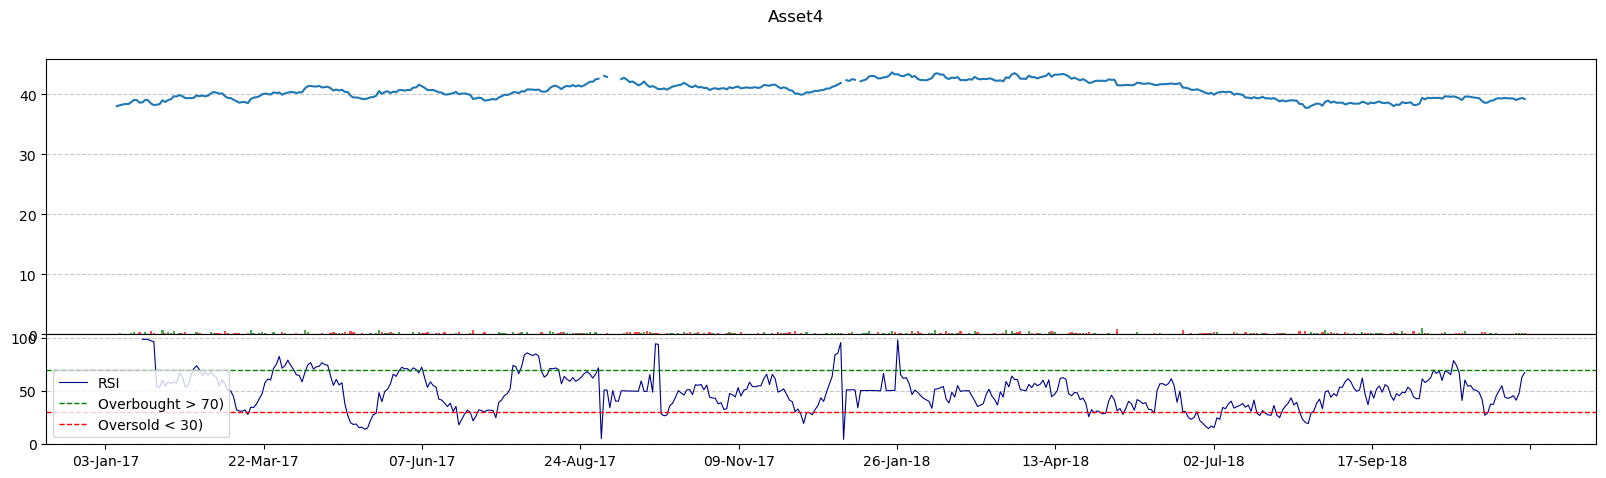

Initial Shares: 100
Initial portfolio value: 3803.0
Current portfolio value: 19585.719999999998
Profit: 19704.739999999998


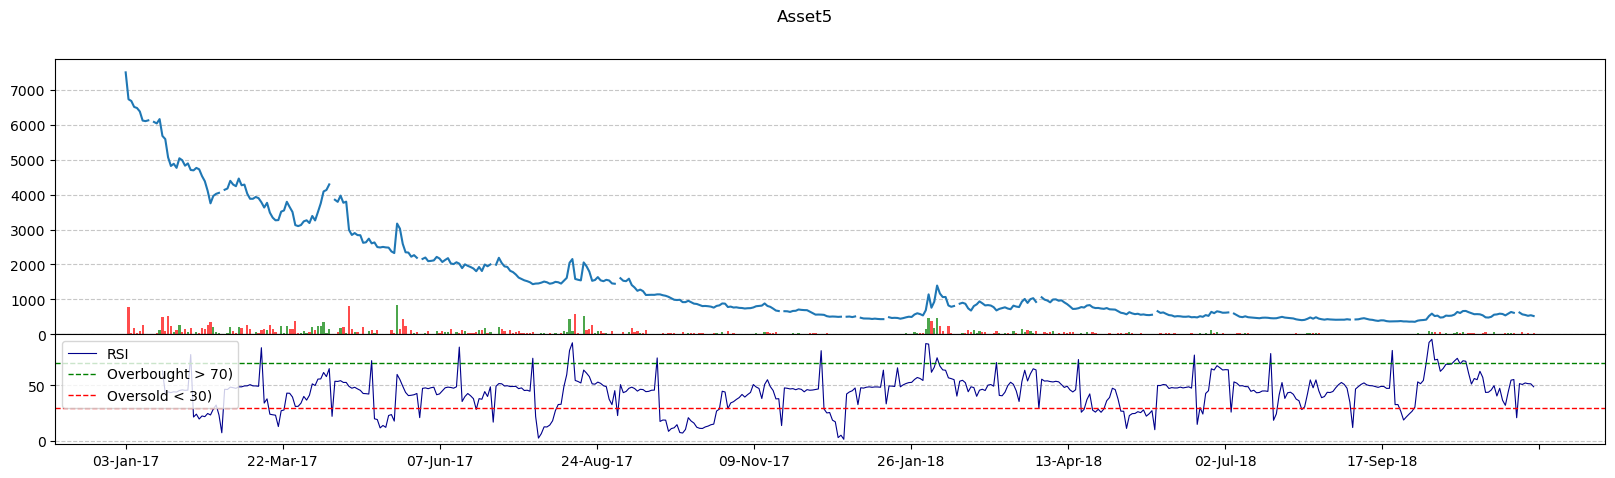

Initial Shares: 100
Initial portfolio value: 750000.0
Current portfolio value: 186580.0
Profit: -511190.0


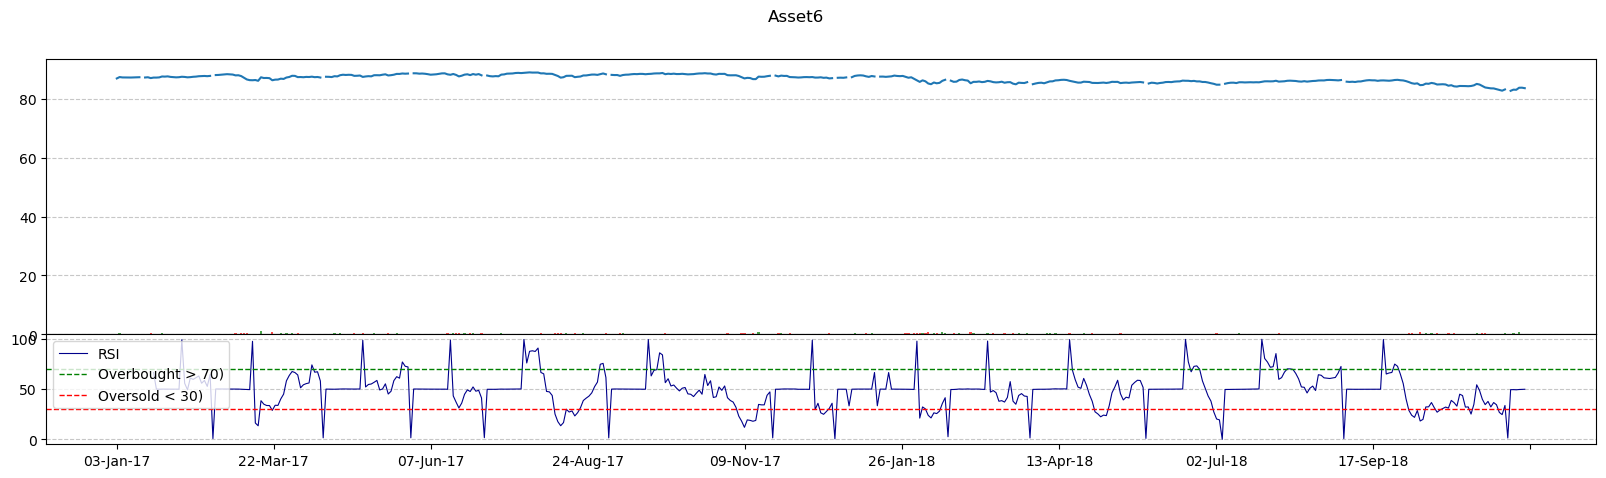

Initial Shares: 100
Initial portfolio value: 8691.0
Current portfolio value: 17347.0
Profit: 17016.0


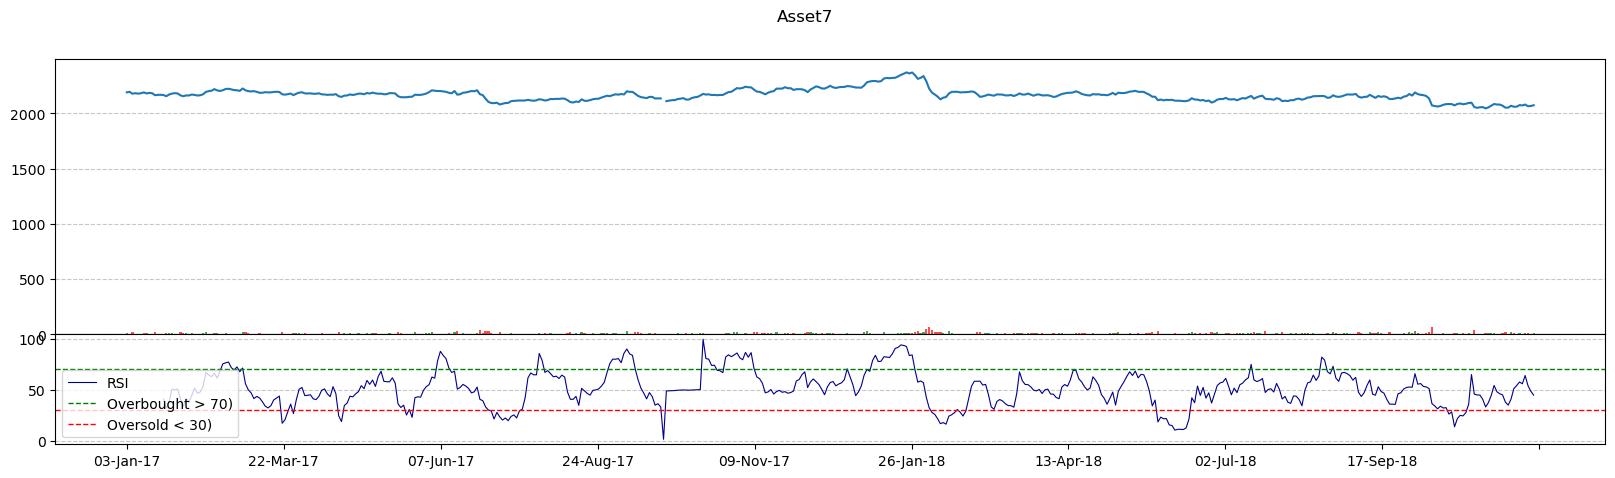

Initial Shares: 100
Initial portfolio value: 218390.90000000002
Current portfolio value: 633683.0
Profit: 622760.5


C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_26384\2750652265.py:18: RuntimeWarning: invalid value encountered in divide
  rs = average_gains / average_losses


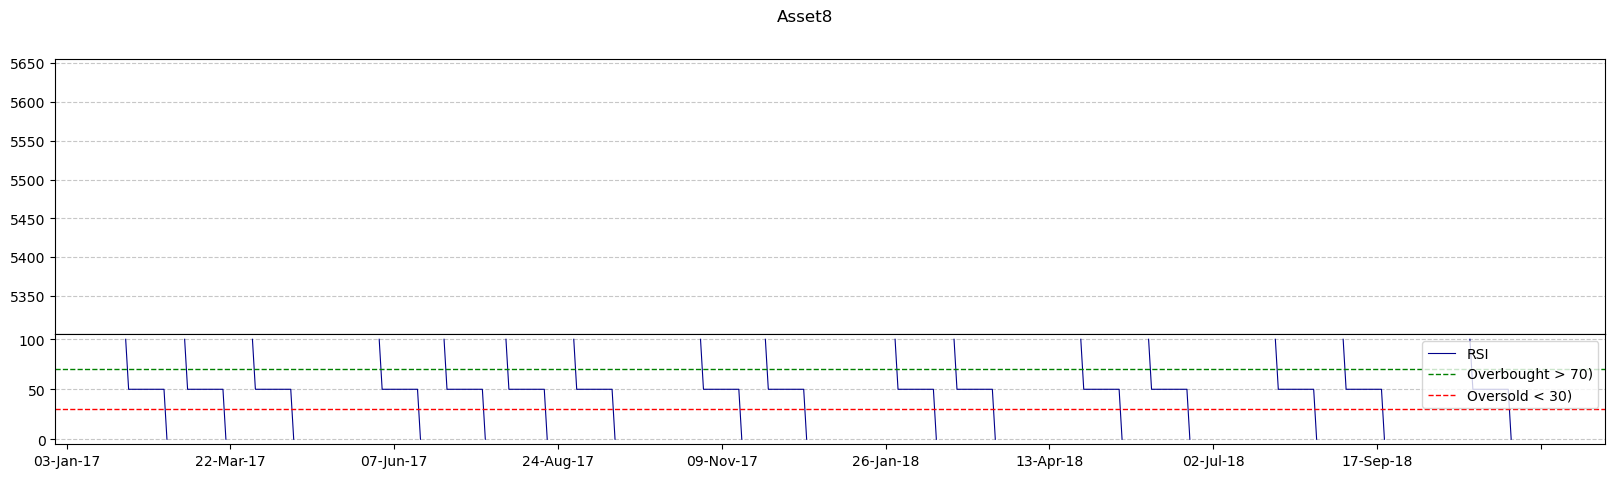

Initial Shares: 100
Initial portfolio value: 531674.5
Current portfolio value: 0.0
Profit: 16725.70000000007


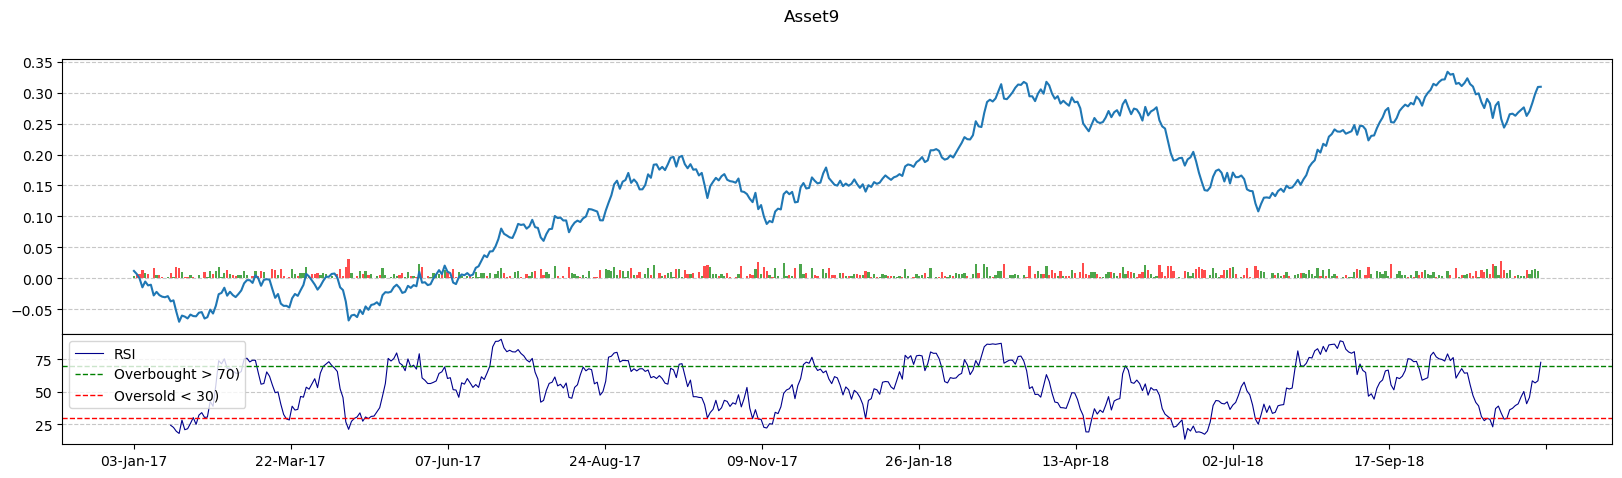

Initial Shares: 100
Initial portfolio value: 0.8456369
Current portfolio value: 66.6771646
Profit: 96.7662665


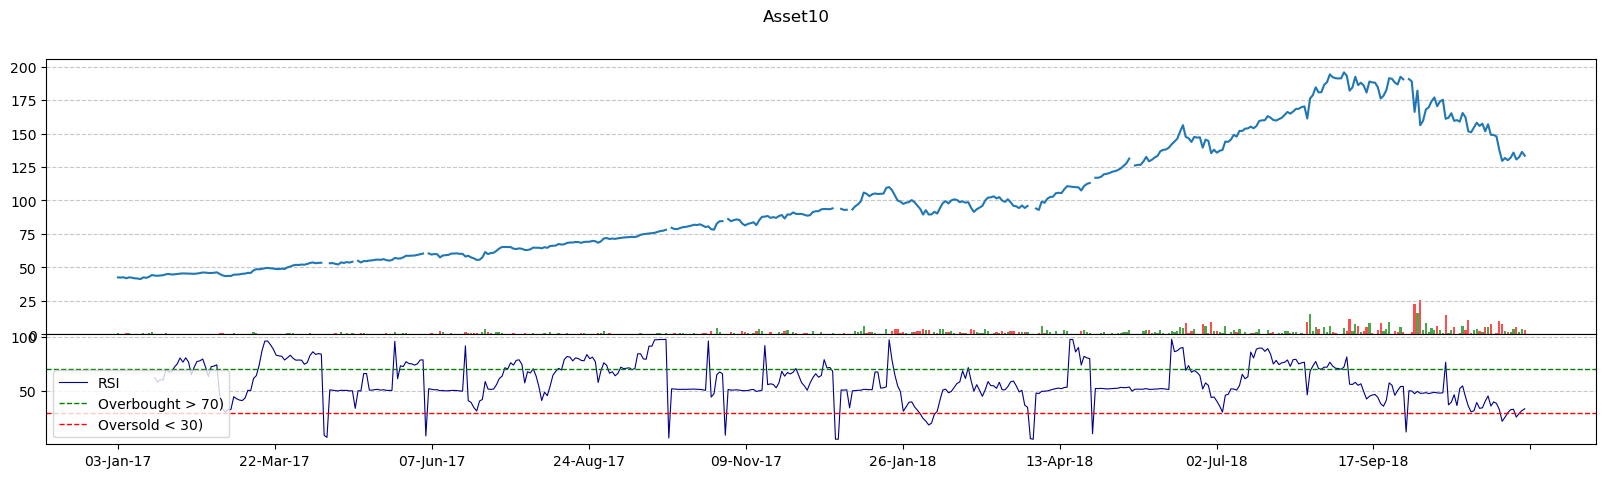

Initial Shares: 100
Initial portfolio value: 4188.0
Current portfolio value: 8952.0
Profit: 18109.0


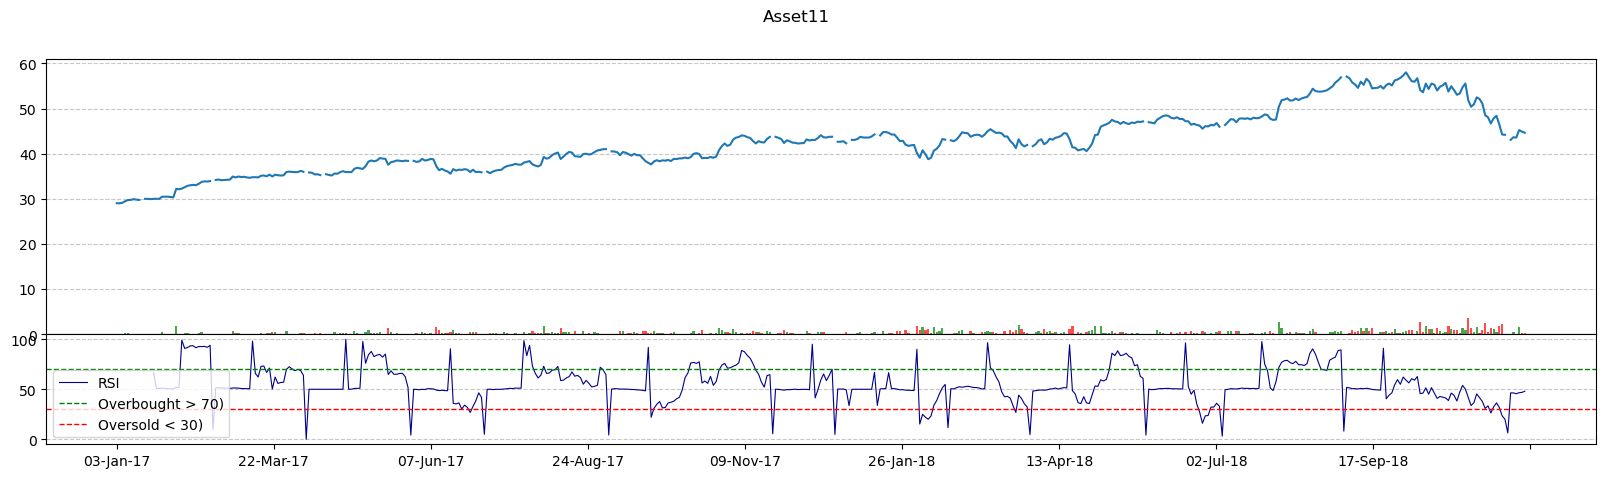

Initial Shares: 100
Initial portfolio value: 2903.8
Current portfolio value: -inf
Profit: -inf


C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_26384\2750652265.py:63: RuntimeWarning: overflow encountered in double_scalars
  portfolio_value += shares * sell_price


In [5]:
for x in range(11):
    # Calculate bar graph of differences
    differences = np.diff(assets[x])
    positive_differences = [diff if diff >= 0 else -diff for diff in differences]
    date_numeric = np.arange(1, len(date))
    colors = ['g' if diff >= 0 else 'r' for diff in differences]

    # Calculate RSI
    rsi_period = 14 # Define RSI period
    price_changes = np.diff(np.nan_to_num(assets[x], nan=0))
    positive_changes = price_changes.copy()
    positive_changes[positive_changes < 0] = 0
    negative_changes = -price_changes.copy()
    negative_changes[negative_changes < 0] = 0
    average_gains = np.convolve(positive_changes, np.ones(rsi_period) / rsi_period, mode='valid')
    average_losses = np.convolve(negative_changes, np.ones(rsi_period) / rsi_period, mode='valid')
    # Calculate Relative Strength (RS)
    rs = average_gains / average_losses
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    # Plotting
    fig, ax = plt.subplots(2, 1, sharex=True,figsize=(20,5),gridspec_kw={'height_ratios': [2, 0.8]})
    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=0)

    # Plot bar graph and asset timeseries
    ax[0].bar(date[1:], positive_differences, align='center', alpha=0.7, color=colors)
    ax[0].plot(date[1:],assets[x][1:])
    ax[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Plot the RSI values
    ax[1].plot(date[rsi_period:], rsi, label='RSI', color = 'darkblue',linewidth = 0.8)
    # Plot hozirontal line indicators
    ax[1].axhline(y=70, color='green', linestyle='--', label='Overbought > 70)', linewidth=1)
    ax[1].axhline(y=30, color='red', linestyle='--', label='Oversold < 30)', linewidth=1)
    ax[1].grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(np.linspace(0, hc, 10))
    plt.suptitle('Asset'+str(x+1))
    plt.legend()
    plt.show()


    # Initialize trading parameters
    shares = 100  # Starting with 100 shares
    buy_signal = False
    sell_signal = False
    portfolio_value = 0  # Initialize portfolio value

    common_length = min(len(date), len(np.nan_to_num(assets[x], nan=0)), len(rsi))

    # Loop through the date array and execute trades based on RSI
    for i in range(common_length):
        current_rsi = rsi[i]

        if current_rsi < 30 and not buy_signal:
            # Buy signal: RSI crosses below the buy threshold
            buy_price = np.nan_to_num(assets[x], nan=0)[i]
            buy_signal = True
        elif current_rsi > 70 and buy_signal:
            # Sell signal: RSI crosses above the sell threshold
            sell_price = np.nan_to_num(assets[x], nan=0)[i]
            portfolio_value += shares * sell_price
            buy_signal = False

    initial_share_value = 100*assets[x][next((i for i, value in enumerate(assets[x]) if not np.isnan(value)), None)]
    profit = portfolio_value + (shares * assets[x][-1]) - initial_share_value

    print('Initial Shares: 100')
    print('Initial portfolio value: '+str(initial_share_value))
    print('Current portfolio value: ' + str(portfolio_value))
    print('Profit: '+str(profit))


- Another technical indicator: the MACD -> gives trend direction and trade momentum. 

    In theory, when MACD falls below the signal line, it indicates a bearish trend whereas when MACD rises above the signal line, it indicates a bullish trend. 

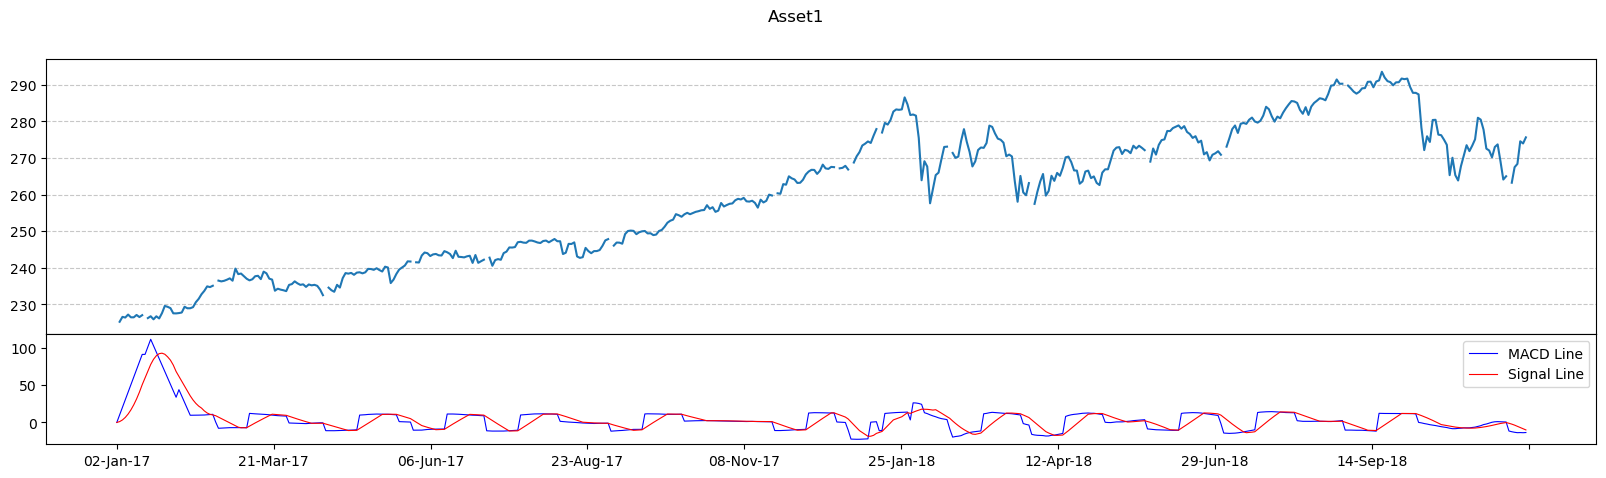

Initial Shares: 100
Initial portfolio value: 22524.0
Current portfolio value: 626936.0
Profit: 631977.0


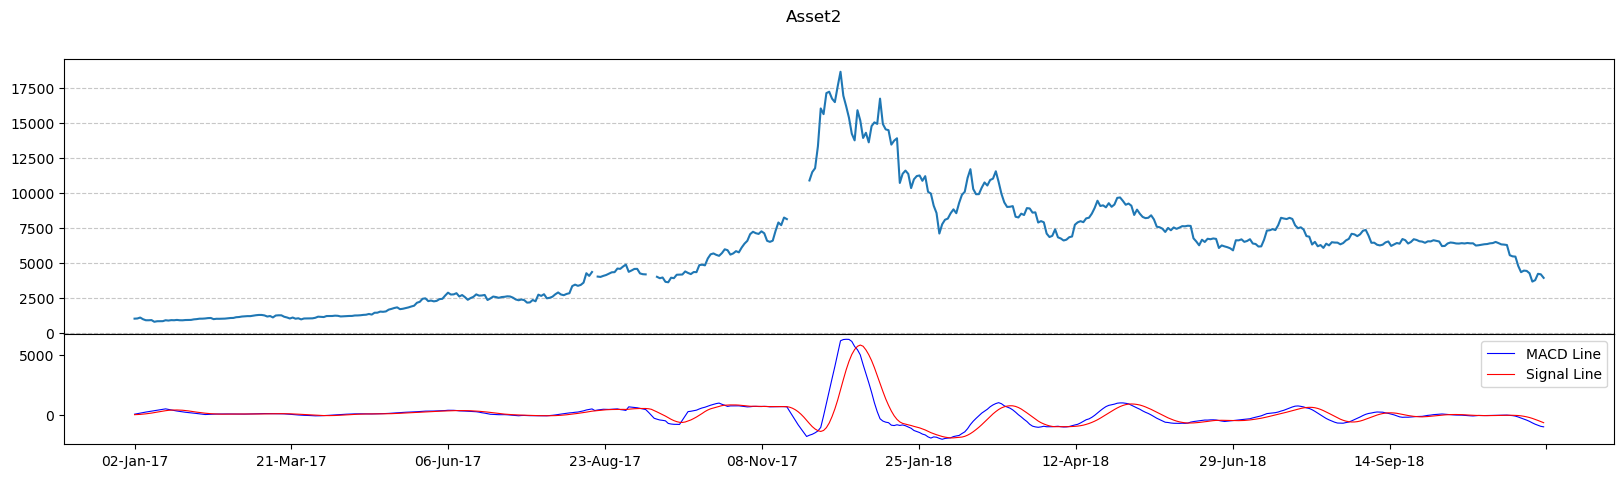

Initial Shares: 100
Initial portfolio value: 101235.0
Current portfolio value: 441389.0
Profit: 733192.0


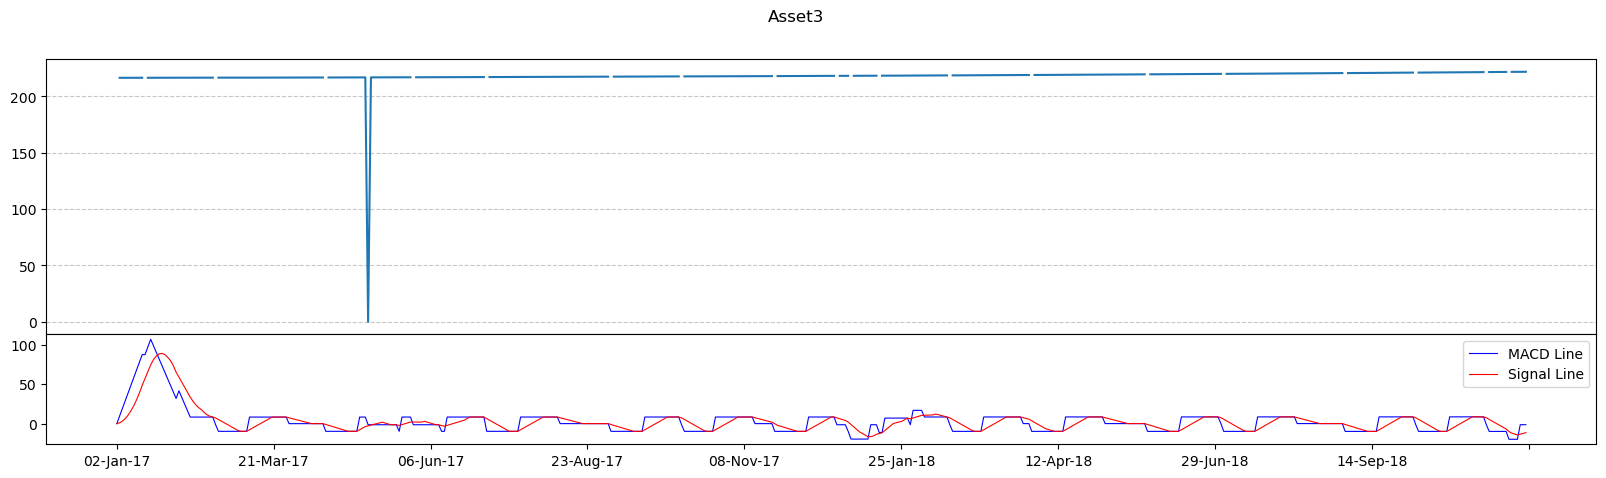

Initial Shares: 100
Initial portfolio value: 21650.5
Current portfolio value: 709889.0
Profit: 710424.6


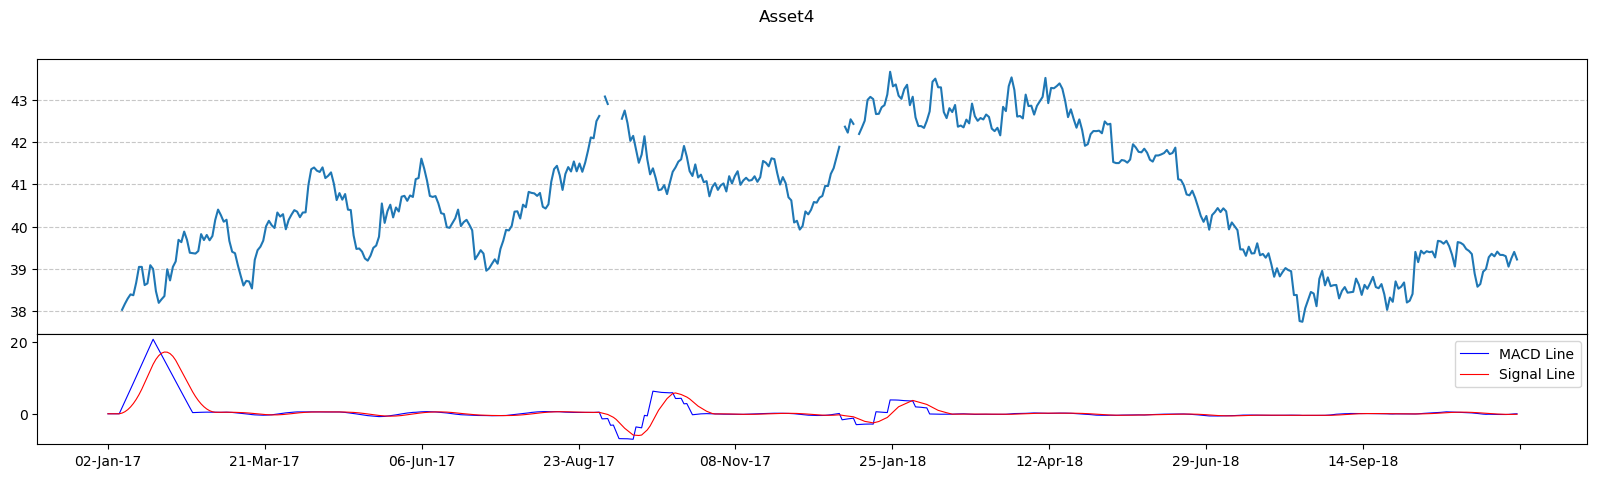

Initial Shares: 100
Initial portfolio value: 3803.0
Current portfolio value: 577108.0
Profit: 577227.02


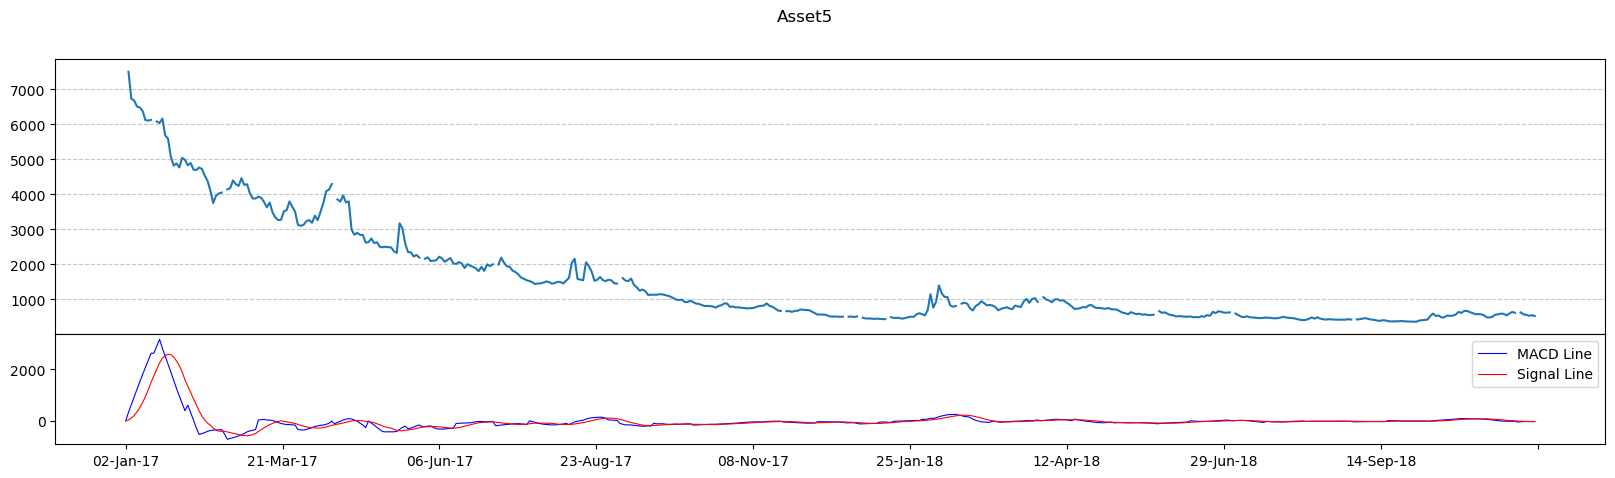

Initial Shares: 100
Initial portfolio value: 750000.0
Current portfolio value: 786151.0
Profit: 88381.0


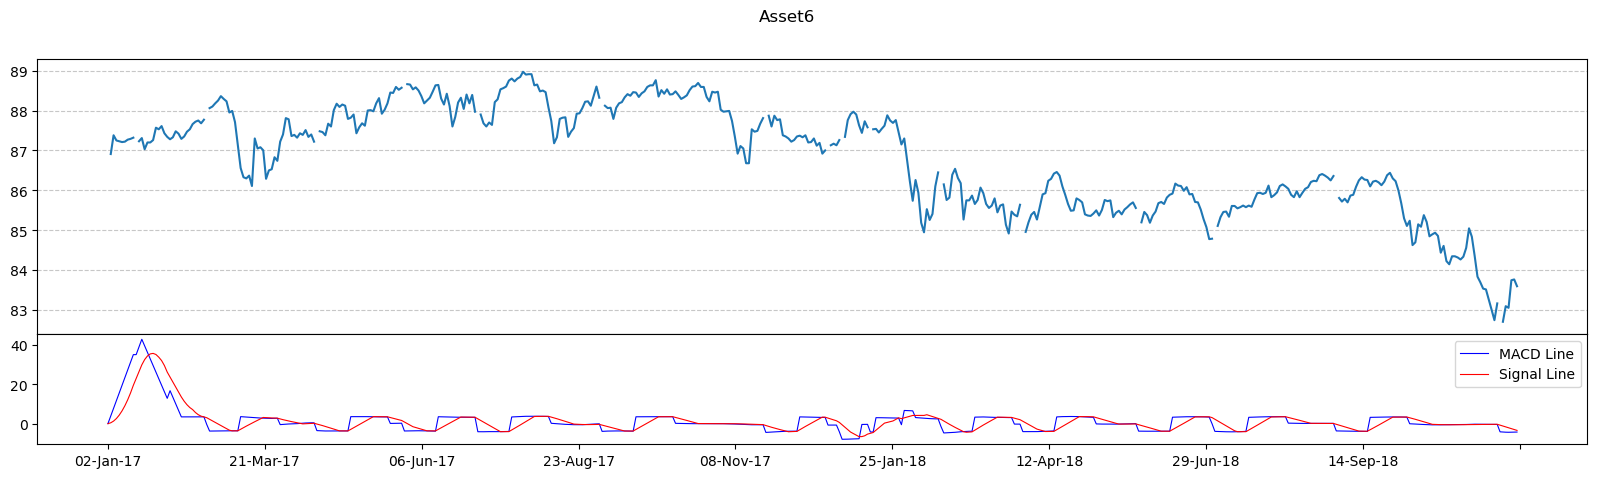

Initial Shares: 100
Initial portfolio value: 8691.0
Current portfolio value: 598141.0
Profit: 597810.0


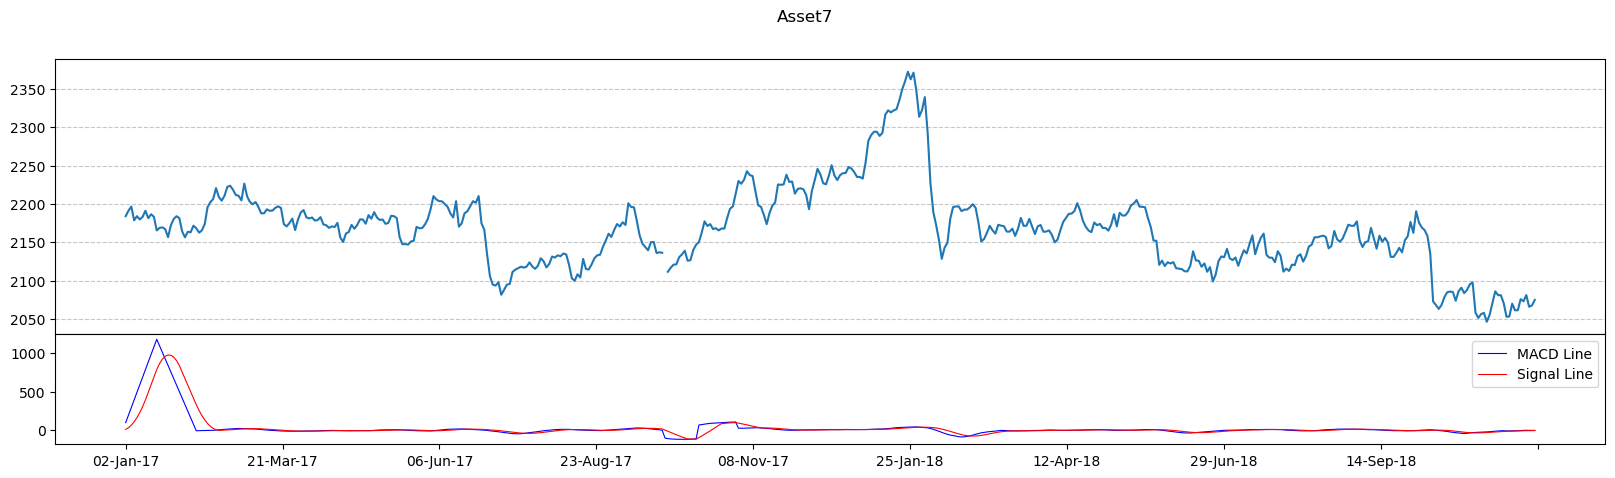

Initial Shares: 100
Initial portfolio value: 218390.90000000002
Current portfolio value: 495593.0
Profit: 484670.5


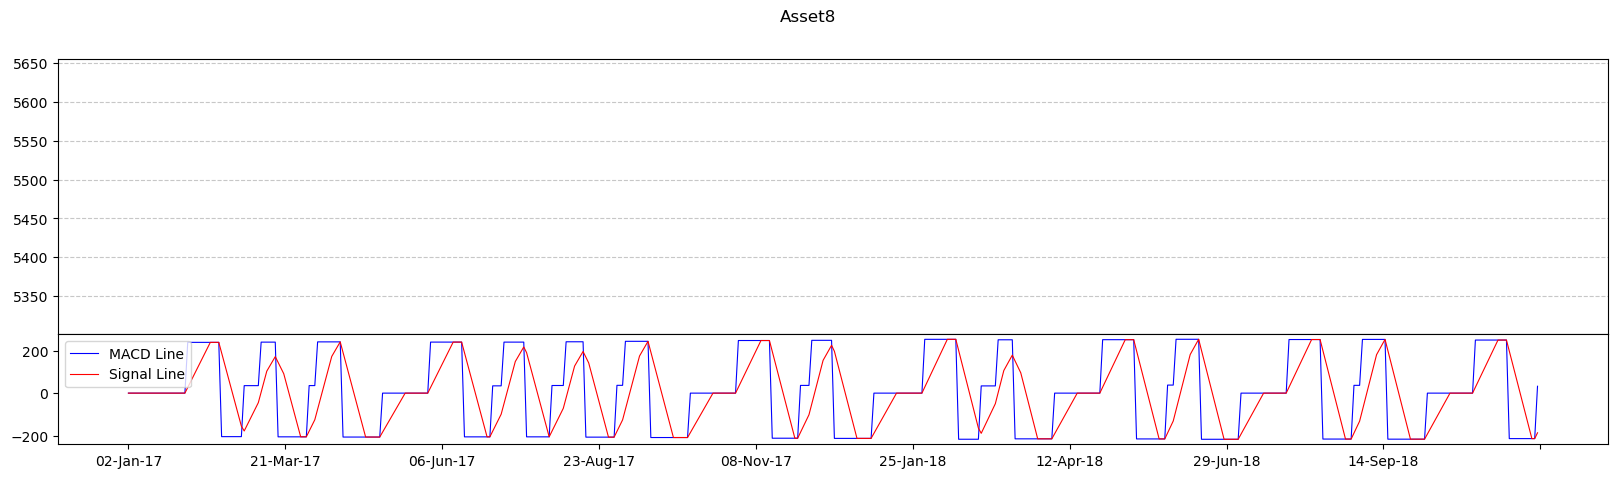

Initial Shares: 100
Initial portfolio value: 531674.5
Current portfolio value: 417999.0
Profit: 434724.70000000007


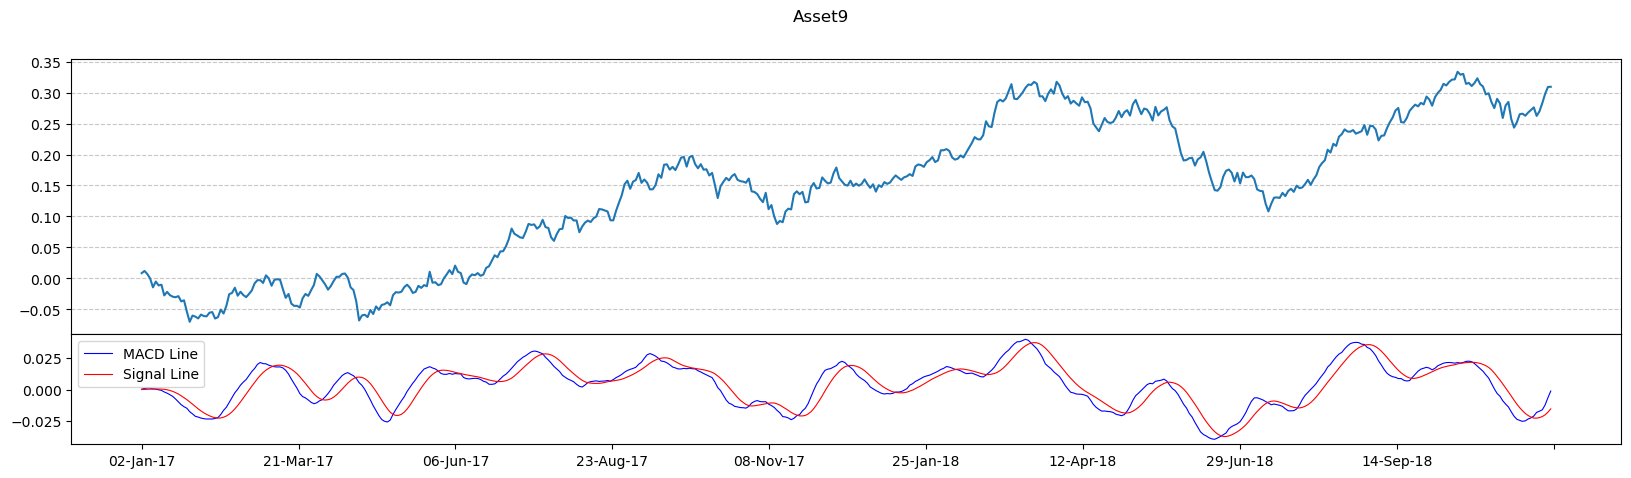

Initial Shares: 100
Initial portfolio value: 0.8456369
Current portfolio value: 311229.0
Profit: 311259.0891019


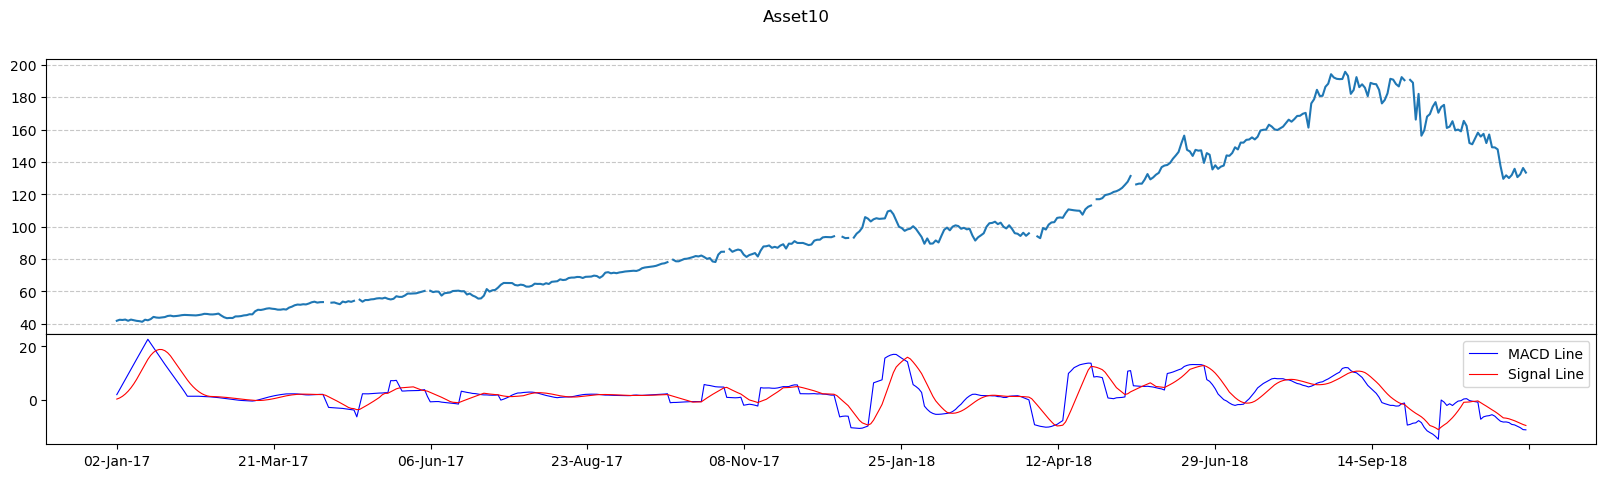

Initial Shares: 100
Initial portfolio value: 4188.0
Current portfolio value: 494602.0
Profit: 503759.0


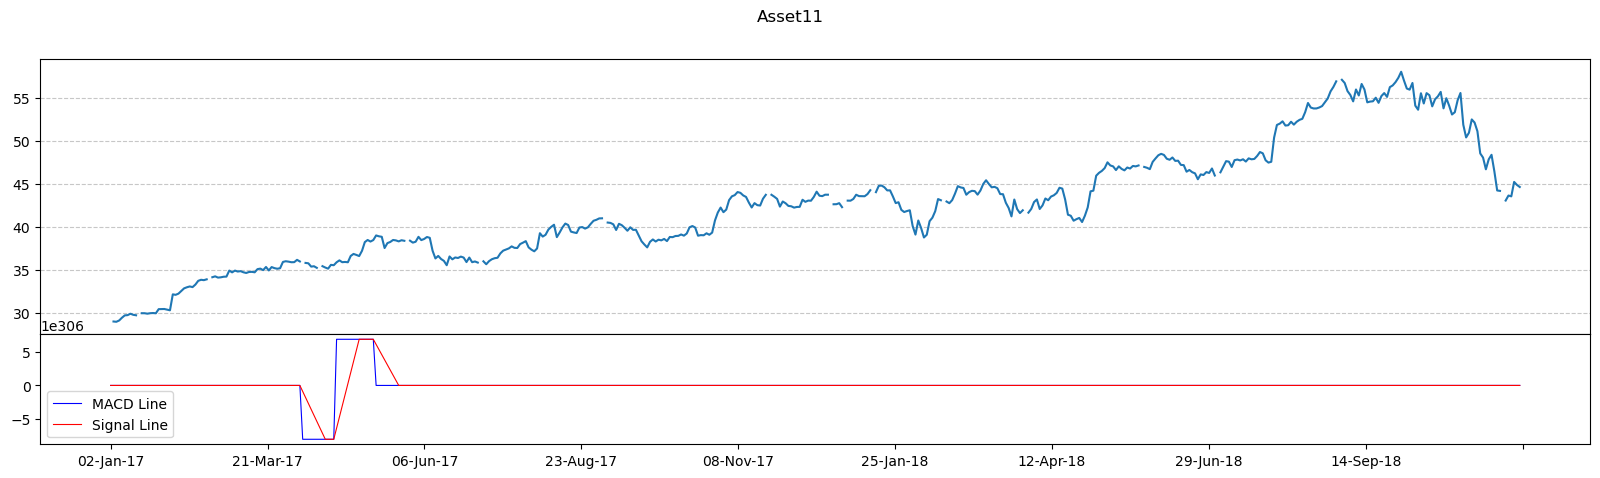

Initial Shares: 100
Initial portfolio value: 2903.8
Current portfolio value: 605523.0
Profit: 607083.7


In [6]:
for x in range(11):

    # Define the MACD parameters
    short_ema_period = 12
    long_ema_period = 26
    signal_ema_period = 9
    short_ema = np.convolve(np.nan_to_num(assets[x], nan=0), np.ones(short_ema_period) / short_ema_period, mode='full')[:len(assets[x])]
    long_ema = np.convolve(np.nan_to_num(assets[x], nan=0), np.ones(long_ema_period) / long_ema_period, mode='full')[:len(assets[x])]
    macd_line = short_ema - long_ema
    signal_line = np.convolve(macd_line, np.ones(signal_ema_period) / signal_ema_period, mode='full')[:len(assets[x])]

    # Plotting
    fig, ax = plt.subplots(2, 1, sharex=True,figsize=(20,5),gridspec_kw={'height_ratios': [2, 0.8]})
    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=0)

    # Plot asset timeseries
    ax[0].plot(date,assets[x])
    ax[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Plot the MACD and Signal Line 
    ax[1].plot(date, macd_line, label='MACD Line', color='blue',linewidth = 0.8)
    ax[1].plot(date, signal_line, label='Signal Line', color='red',linewidth = 0.8)

    plt.xticks(np.linspace(0, hc, 10))
    plt.suptitle('Asset'+str(x+1))
    plt.legend()
    plt.show()


    # Initialize trading parameters
    shares = 100  # Start with 100 shares
    buy_signal = False
    sell_signal = False
    portfolio_value = 0  # Start with no portfolio value

    for i in range(len(date)):
        if i < signal_ema_period:
            continue  # Skip the first few days for more stable predictions
        if macd_line[i] < signal_line[i] and not buy_signal:
            # Buy signal: MACD falls below the Signal line
            buy_price = np.nan_to_num(assets[0], nan=0)[i]
            buy_signal = True
        elif macd_line[i] > signal_line[i] and buy_signal:
            # Sell signal: MACD rises above the Signal line
            sell_price = np.nan_to_num(assets[0], nan=0)[i]
            portfolio_value += shares * sell_price
            buy_signal = False

    initial_share_value = 100*assets[x][next((i for i, value in enumerate(assets[x]) if not np.isnan(value)), None)]
    profit = portfolio_value + (shares * assets[x][-1]) - initial_share_value

    print('Initial Shares: 100')
    print('Initial portfolio value: '+str(initial_share_value))
    print('Current portfolio value: ' + str(portfolio_value))
    print('Profit: '+str(profit))

A few notes on the indicators: 

- The simulated profits are suspiciously high even for overall bearish markets like asset5 and 6 but the code and logic does not seem wrong. Need to double check if there is more time. <br>Otherwise, MACD works better for bearish markets than the RSI indicator.
- MACD is observed to fluctuate intially, therefore it is advised to collect more data before trading.
- Persistent bug with asset11, need to fix. Does not seem to be a problem with the initial NaN element of array since code works for asset01.

___

Looking forward / Work in progress

- Work on the remaining points 2, 3, 4. The general approach and methodology has been stated above. 
- Fix bugs especially with pyplot for asset8 and indicator code for asset 11.
- Double check simulation code due to excessively high returns.

Concluding remarks

- point 2 timeseries analysis is a more rigorous approach but in the interest of time, I wanted my submission to contain some actual results and therefore worked on point 1 instead. I will work on point 2 separately to examine this approach.
- my university course is currently on statistical processing, specifically with markov chains, AR, MA probability models. Will be interesting to see if concepts covered in these lectures can be applied to this assignment 
- this experience has been very fun and I thoroughly enjoyed myself